<a href="https://colab.research.google.com/github/KayKozaronek/03_Courses/blob/master/Course_2_Part_4_Lesson_2_(Cats_v_Dogs_Image_Augmentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cats vs Dogs Image Augmentation

Let's start with a model that's very effective at learning Cats v Dogs.

Note that there are 4 convolutional layers with 32, 64, 128 and 128 convolutions respectively.

Also, this will train for 100 epochs, because we want to plot the graph of loss and accuracy.


In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

import os
import zipfile
import tensorflow as tf 
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

local_zip = "/tmp/cats_and_dogs_filtered.zip"
zip_ref = zipfile.ZipFile(local_zip,"r")
zip_ref.extractall("/tmp")
zip_ref.close()

base_dir = "/tmp/cats_and_dogs_filtered"
train_dir = os.path.join(base_dir,"train")
validation_dir = os.path.join(base_dir, "validation")

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, "cats")

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, "dogs")

# Direction with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, "cats")

# Direction with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, "dogs")

--2020-05-01 09:26:07--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.140.128, 2a00:1450:400c:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.140.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   146MB/s    in 0.4s    

2020-05-01 09:26:08 (146 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



## Define model

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape = (150,150,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, activation= "relu", kernel_size=(3,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation ="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")]
)

model.compile(loss ="binary_crossentropy",
              optimizer= RMSprop(learning_rate =1e-4), #1e-4 == 0.0001
              metrics = ["accuracy"])

## Create train and validation generator

In [3]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)

# Flow training images in batches of 20 using trin_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,              #This is the source directory for our training images
    target_size=(150,150),  #All images will be resized to 150 x 150
    batch_size=20,          
    class_mode="binary"     #Since we use binary_crossentropy loss, we need binary labels
)

# Flow validation images in batches of 20 using test_data generator
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode="binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Let's run the model and see how it performs

In [4]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,  #2000 images = batch_size * steps
    epochs = 100,
    validation_data = validation_generator,
    validation_steps =50,  #1000 images = batch_size * steps
    verbose = 1
)

Epoch 1/100
100/100 [==============================] - 9s 93ms/step - loss: 0.6940 - accuracy: 0.5180 - val_loss: 0.6786 - val_accuracy: 0.5200
Epoch 2/100
100/100 [==============================] - 9s 91ms/step - loss: 0.6648 - accuracy: 0.5950 - val_loss: 0.7105 - val_accuracy: 0.5050
Epoch 3/100
100/100 [==============================] - 9s 93ms/step - loss: 0.6248 - accuracy: 0.6585 - val_loss: 0.6071 - val_accuracy: 0.6710
Epoch 4/100
100/100 [==============================] - 9s 91ms/step - loss: 0.5817 - accuracy: 0.6980 - val_loss: 0.6010 - val_accuracy: 0.6720
Epoch 5/100
100/100 [==============================] - 9s 91ms/step - loss: 0.5497 - accuracy: 0.7240 - val_loss: 0.6022 - val_accuracy: 0.6560
Epoch 6/100
100/100 [==============================] - 9s 93ms/step - loss: 0.5145 - accuracy: 0.7420 - val_loss: 0.5539 - val_accuracy: 0.7080
Epoch 7/100
100/100 [==============================] - 9s 91ms/step - loss: 0.4894 - accuracy: 0.7640 - val_loss: 0.5776 - val_accuracy:

## Plot Training and validation accuracy

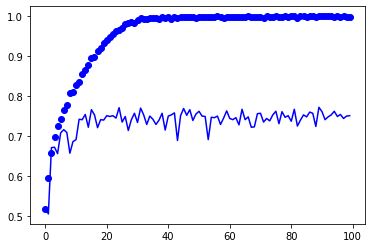

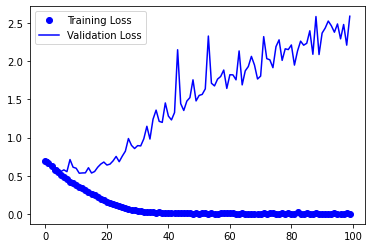

In [32]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
#plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
#plt.title("Training and validation loss")
plt.legend()

plt.show()

## The model is overfitting
The Training Accuracy is close to 100%, and the validation accuracy is in the 70%-80% range. This is a great example of overfitting -- which in short means that it can do very well with images it has seen before, but not so well with images it hasn't. 

Let's see if we can do better to avoid overfitting -- and one simple method is to augment the images a bit. If you think about it, most pictures of a cat are very similar -- the ears are at the top, then the eyes, then the mouth etc. Things like the distance between the eyes and ears will always be quite similar too. 


What if we tweak with the images to change this up a bit -- rotate the image, squash it, etc.  That's what image augementation is all about. And there's an API that makes it easy...


Now take a look at the ImageGenerator. There are properties on it that you can use to augment the image. 

```
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
```
These are just a few of the options available (for more, see the Keras documentation. Let's quickly go over what we just wrote:

* `rotation_range` is a value in degrees (0–180), a range within which to randomly rotate pictures.
* `width_shift` and `height_shift` are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
* `shear_range` is for randomly applying shearing transformations.
* `zoom_range` is for randomly zooming inside pictures.
* `horizontal_flip` is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
* `fill_mode` is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.


Here's some code where we've added Image Augmentation. Run it to see the impact.


In [45]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

# Imports 
import os 
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import keras

# Extract zip 4
local_zip = "/tmp/cats_and_dogs_filtered.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp")
zip_ref.close()

# Create directories -3
base_dir = "/tmp/cats_and_dogs_filtered"
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

# Create subdirectories - 4
train_cats_dir = os.path.join(train_dir, "cats")
train_dogs_dir = os.path.join(train_dir, "dogs")
validation_dogs_dir = os.path.join(validation_dir, "dogs")
validation_cats_dir = os.path.join(validation_dir, "cats")

# Create model - 4 layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size =(3,3),input_shape=(150,150,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(pool_size =(2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation= "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation= "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation= "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(1, activation ="sigmoid")
])

# Compile model 
model.compile(optimizer=RMSprop(lr =1e-4),
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

# Implement the image augmentation 
train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Flow training images 
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 20,
    class_mode ="binary")

# Flow validation images
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# Run the model
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

--2020-05-01 10:51:57--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 2a00:1450:400c:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   127MB/s    in 0.5s    

2020-05-01 10:51:58 (127 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 24s 236ms/step - loss: 2.3907 - accuracy: 0.5215 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/100
100/100 [==============================] - 24s 238ms/step - loss: 0.7842 - accuracy: 0.5025 - val_loss: 0.6930 - val_accuracy: 0.5080
Epoch 3/100
100/100 [

## Plot Training and Validation Accuracy and loss

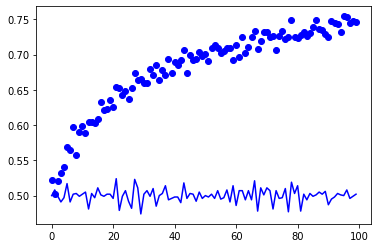

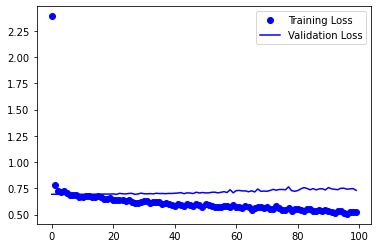

In [49]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
#plt.title("Training and validation accuracy")

plt.figure()

plt.plot(epochs, loss,"bo", label= "Training Loss")
plt.plot(epochs, val_loss, "b", label= "Validation Loss")
#plt.title("Training and Validation Loss")

plt.legend()
plt.show()